<img src="http://images3.memedroid.com/images/UPLOADED128/5e6c34c3682fb.jpeg" width="500" alt="cognitiveclass.ai logo"  />
<center>
    <img src="https://miro.medium.com/max/1200/1*LEmBCYAttxS6uI6rEyPLMQ.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align=center><font size = 5>Linear Regression</font></h1>


# Model Development

Estimated time needed: **30** minutes


<p> Linear regression is a statistical method that estimates a dependant (target) variable - Y- relative to one or more independent (predictor) variables -X(i)-, assuming a linear relationship.

A linear relationship is one where the variables lie on a line. In mathematical terms:</p>

$$ Y= B₀ + B₁X$$

<p>where</p>
<ul>
    <li>Y: Independent (target) variable</li>
    <li>X: Dependant (target) variable</li>
    <li>BO: Intercept</li>
    <li>B1:coefficient of X (this is actually the normalized dot product between Y and X)</li>
</ul>

# Simple linear regression

A linear regression with one independent and one dependent variable.
$$
E.g. y = ax+b
$$

<p>This can be as simple as <strong> y= [y1], x=[x1], b=[b1], a </strong> is just a number (scalar)</p>
<p>Or: We can have each of y,x,b be a single column array:</p>

$$ 
[y₀] = a [x₀] + [b₀]\\
[y₁] = a [x₁] + [b₁]\\
...\\
[yₙ] = a [xₙ] + [bₙ]
$$

<h4>Setup</h4>
 Import libraries


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Python LinearRegression Package 

In [35]:
from sklearn.linear_model import LinearRegression

load data and store in dataframe df:


In [36]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


create a linear regression object using the constructor


In [37]:
lm=LinearRegression()
lm

LinearRegression()

In [38]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<p>Find the <strong>Slope</strong> and <strong>Intercept</strong></p>


In [39]:
# Slope 
lm.coef_

array([-821.73337832])

In [40]:
# Intercept
lm.intercept_

38423.3058581574

<h2>Graphe Linear Regression</h2>

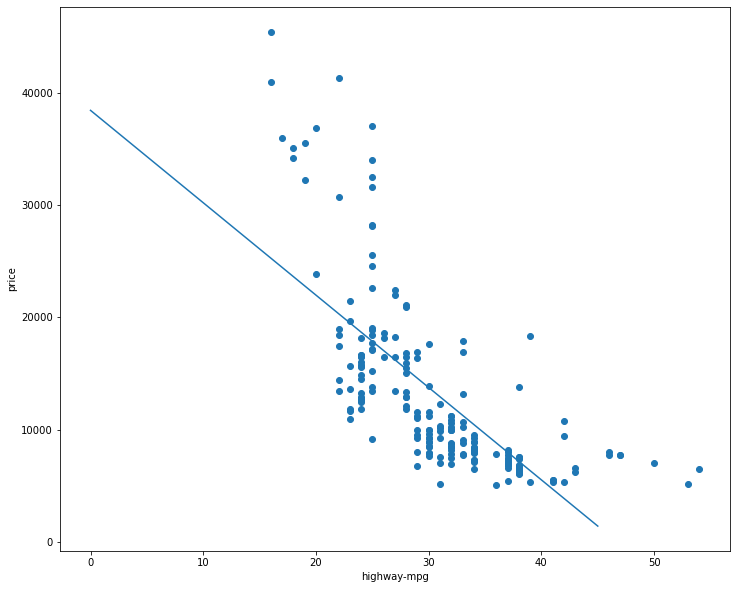

In [45]:
# predict y from the data
x_new = np.linspace(0, 45, )
y_new = lm.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(12, 10))
ax = plt.axes()
ax.scatter(X, Y)
ax.plot(x_new, y_new)

ax.set_xlabel('highway-mpg')
ax.set_ylabel('price')




plt.show()

# Multiple Linear Regression
<p>A linear regression with one dependent variable (target) and multiple independent variables (predictors). 
Note: It is very common to denote the predictors or independent variables by Xi</p>


E.g
$$
y0  = b00  + b01x01 +  b02 x02  + b03 x03 +...+ b0n  x0n\\
y1  = b10  + b11x11 +  b12 x12  + b13 x13 +...+ b1n  xn1 \\
y2  = b20  + b21x21 +  b22 x22  + b23 x23 +...+ b2n  xn2 \\
...\\
ym  = bm0 + bm1 xm1 +  bm2 xm2  + bm3 xm3 +...+ bmn xmn \\
$$

<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [28]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [30]:
lm.fit(Z, df['price'])

LinearRegression()

In [31]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

# Error (White Noise)
<p> In reality our data is usually full of missing values, errors, misread measurements etc. So how can we even be sure of the validity of our predictions? </p>
<ol>
    <li>Make sure we have a large data sample , enough so the law of large numbers works.<br>
        <p> E.g. It may be the case that 3 coin tosses in a row all come up heads, or 7 out of 10 come up heads But we would usually expect, out of 100 tosses more or less half of them will definitely be heads.</p>
    </li>
    <li>
        We also assume that the errors are independent (uncorrelated) with each other. Hence we can assume the errors cancel out.
        <br>
        <p> Just like in the coin toss example we assume half the errors have a positive effect and the other half have a negative effect (weighted if you must). Since the result of one toss does not influence the next, the tosses are independent. So if each toss represents an error we would expect the errors to cancel out.
</p>
        </li>

    
    
</ol>

In Linear Regression this would look like

$$
    Y = XB+U
$$


<p> Where Y is an array column with Y’s values (the targets’ values, that we want to predict)</p>
<p>X is an array matrix with the row and column values of the predictors’ matrix</p>
<p>B is an array matrix with the coefficients of X, we estimate this</p>
<p>U is a column array with the noise (errors) of each entry</p>


# Resources

Books: 
<ul>
    <li><a href="https://www.amazon.com/Applied-Regression-Analysis-Generalized-Linear/dp/1452205663/ref=dp_ob_title_bk">Applied Regression Analysis Generalized-Linear</a> </li>
  
</ul>

Courses: 
<ul>
    <li><a href="https://www.coursera.org/learn/linear-regression-model"> Linear Regression Model Class</a></li>
  
</ul>

Noise in linear regression:
<ul>
    <li><a href="https://www.rdatagen.net/post/linear-regression-models-assume-noise-is-independent/">Linear Regression Noise</a> </li>
  
</ul>


Calculators:
<ul>
    <li><a href="https://www.graphpad.com/quickcalcs/linear1/"> Linear regression calculator</a></li>
  
</ul>

Presentation:
<ul>
    <li><a href="https://github.com/aaroncarby/PythonTutorial/blob/main/Linear%20Regression.ipynb
"> Linear regression calculator</a></li>
  
</ul>